<a href="https://colab.research.google.com/github/princeKike27/Honey-Production/blob/main/Honey_Bee_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honey Bee Production

For this project I analyzed data from honey production in the US. As you may have heard, honeybees are in a precarious state right now; news and articles are informing about the decline of the honeybee population for various reasons and the impact it will cause on the entire planet. I will investigate this decline and how the trends of the past predict the future for the honeybees.



In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Honey-Production/main/honey_production.csv')

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
# check columns names
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year '],
      dtype='object')

In [4]:
# rename incosistent column
df.rename(columns={'year ': 'year'}, inplace=True)

In [5]:
# check column types
df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

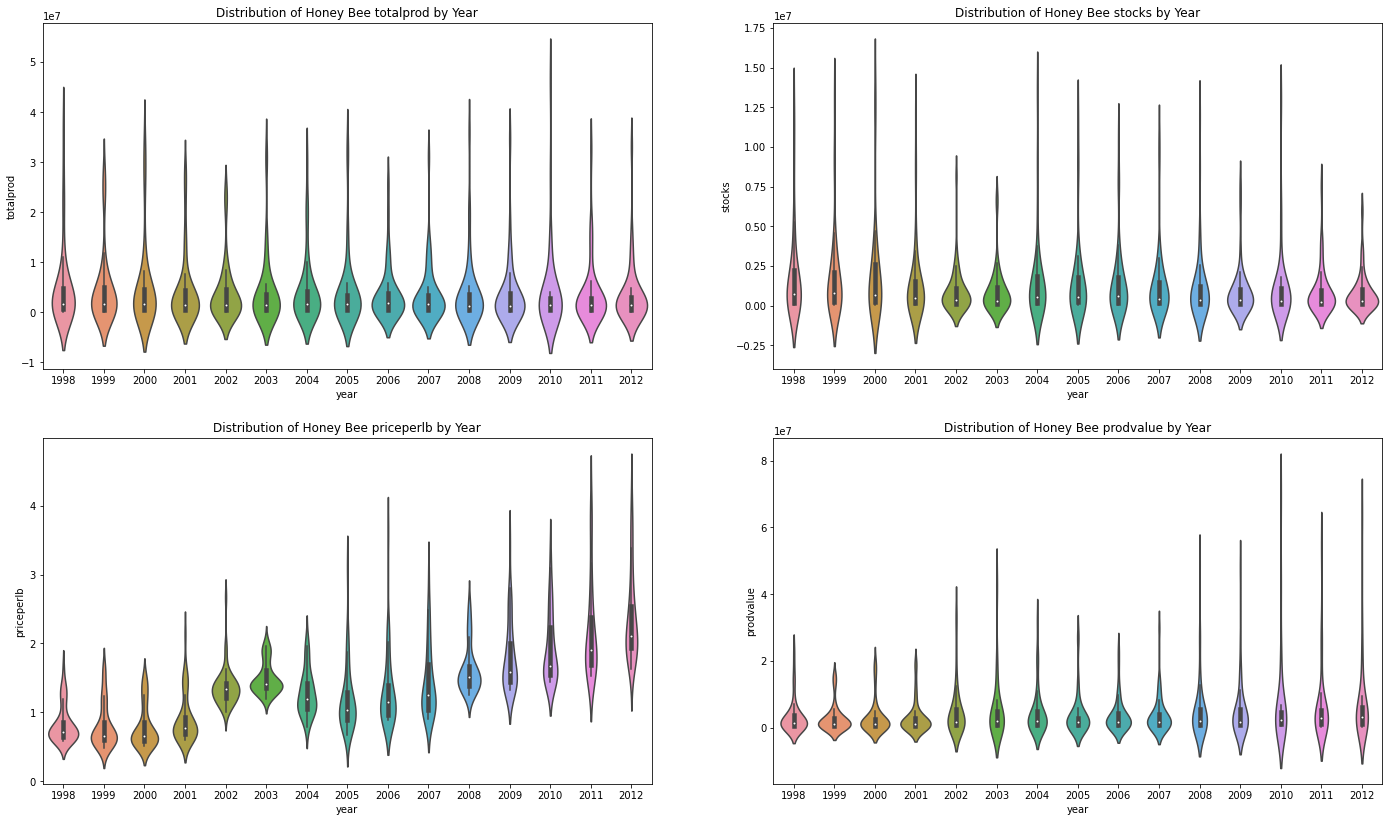

In [6]:
# plot distribution of Honey Bee totalprod, stocks, priceperlb and prodvalue by year

# list of column names we want to plot
ls = ['totalprod', 'stocks', 'priceperlb', 'prodvalue']
graph_num = 1

fig = plt.figure(figsize=(24,14))

for el in ls:
  ax = plt.subplot(2, 2, graph_num)
  sns.violinplot(x='year', y=el, data=df)
  plt.title(f'Distribution of Honey Bee {el} by Year')
  graph_num += 1

plt.show()




In [7]:
# get the avg production, stocks and priceperlb by year

def honey_params(df):
  calc = {}
  calc['avg_production'] = df['totalprod'].mean()
  calc['avg_stock'] = df['stocks'].mean()
  calc['avg_priceperlb'] = df['priceperlb'].mean()
  return pd.Series(calc, index=['avg_production', 'avg_stock', 'avg_priceperlb'])


avg_prod_year = df.groupby(['year']).apply(honey_params).reset_index()
avg_prod_year.head()

,year,avg_production,avg_stock,avg_priceperlb
0,1998,5.105093e+06,1.873605e+06,0.832558
1,1999,4.706674e+06,1.823023e+06,0.804186
2,2000,5.106000e+06,1.975721e+06,0.791395
3,2001,4.221545e+06,1.471909e+06,0.911818
4,2002,3.892386e+06,8.903864e+05,1.371364


In [8]:
avg_prod_year['avg_production'] = avg_prod_year.avg_production.astype(int)
avg_prod_year['avg_stock'] = avg_prod_year.avg_stock.astype(int)

avg_prod_year.head()

,year,avg_production,avg_stock,avg_priceperlb
0,1998,5105093,1873604,0.832558
1,1999,4706674,1823023,0.804186
2,2000,5106000,1975720,0.791395
3,2001,4221545,1471909,0.911818
4,2002,3892386,890386,1.371364


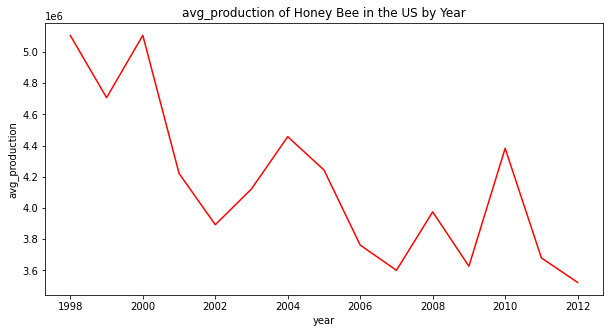

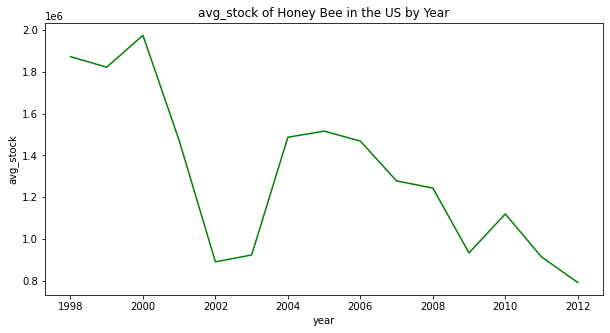

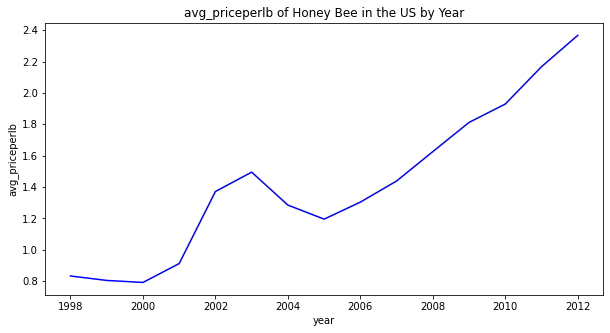

In [9]:
# plot the avg production, stock and priceperlb of Honey Bee production in the US

# store y values in a list
y_values = list(avg_prod_year.columns[1::])
y_values

# store colors of lines 
colors = ['red', 'green', 'blue']

for el in range(len(y_values)):
  f, ax = plt.subplots(figsize=(10,5))
  sns.lineplot(x='year', y=y_values[el], data=avg_prod_year, color=colors[el])
  plt.title(f'{y_values[el]} of Honey Bee in the US by Year')

  plt.show()


# Scatter Plot - year Vs totalprod

In [29]:
year_avg_prod = df.groupby(['year']).totalprod.mean().reset_index()
year_avg_prod.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [27]:
# prepare x and y values

y = avg_prod_year['avg_production']
X = avg_prod_year['year']
print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

# reshape X to have one value in each row
X = X.values.reshape(-1, 1)
print('After Reshape')
X.shape

X Shape: (15,)
Y Shape: (15,)
After Reshape


(15, 1)

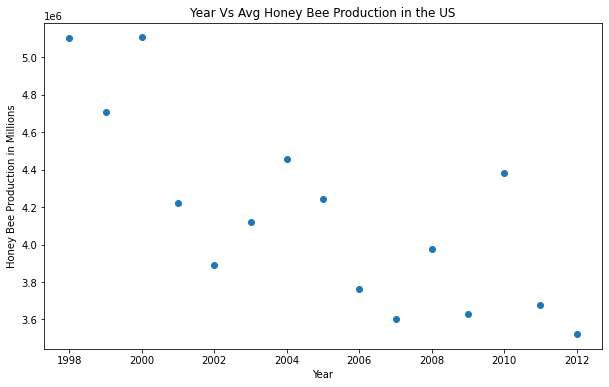

In [31]:
# scatter plot

f, ax = plt.subplots(figsize=(10, 6))

plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Honey Bee Production in Millions')

plt.title('Year Vs Avg Honey Bee Production in the US')
plt.show()

# Lineas Regression Model

In [40]:
# import sklearn module
from sklearn.linear_model import LinearRegression

# create and fit linear model
line_fitter = LinearRegression()
line_fitter.fit(X, y)

# save b and m
b = line_fitter.intercept_
m = line_fitter.coef_[0]
print(f'b: {b}')
print(f'm: {m}')

# predict y values
y_predict = line_fitter.predict(X)

b: 181208047.24761897
m: -88303.1714285714


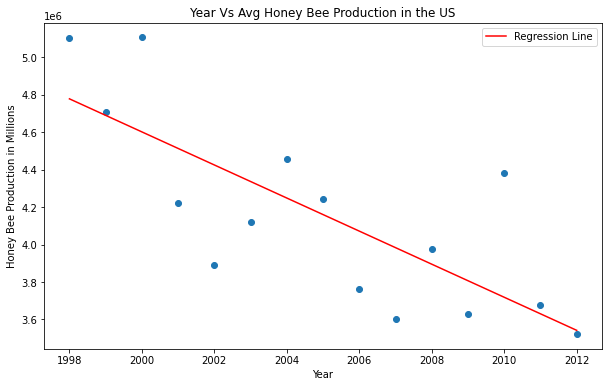

In [41]:
# plot scatter plot with regression line

f, ax = plt.subplots(figsize=(10, 6))

plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Honey Bee Production in Millions')
plt.title('Year Vs Avg Honey Bee Production in the US')

plt.plot(X, y_predict, color='red', label='Regression Line')

plt.legend()
plt.show()


# Predict Honey Decline
- How would honey production be in 2050?

In [43]:
# create array containing years from 2013 to 2050
X_future = np.array(range(2013, 2051))
# reshape X >> (-1, 1)
X_future = X_future.reshape(-1, 1)

# predict future_y
future_predict = [m * el + b for el in X_future]

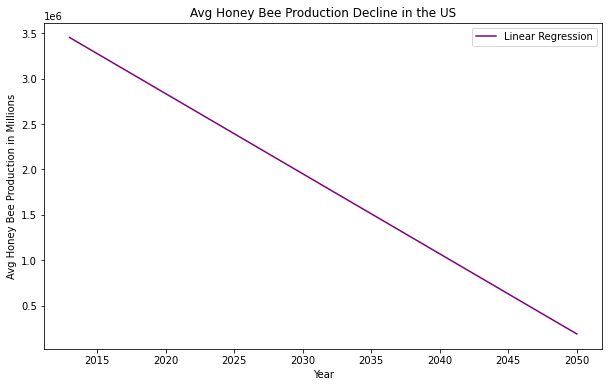

In [46]:
# plot honey decline

f, ax = plt.subplots(figsize=(10, 6))
plt.plot(X_future, future_predict, color='purple', label='Linear Regression')

plt.xlabel('Year')
plt.ylabel('Avg Honey Bee Production in Millions')

plt.title('Avg Honey Bee Production Decline in the US')
plt.legend()
plt.show()
